In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df=pd.read_csv(r"house (1) (1) (1).csv")
df

,price,area_sqft,bedrooms,bathrooms,year_built,location,distance_to_city_center,has_garage,has_pool,condition,crime_rate,school_rating
0,320000,1450,3,2.0,1998,SouthEnd,5.2,1,0,3,8.7,6
1,455000,1870,4,2.5,2005,NorthDale,3.6,1,0,4,3.2,8
2,285000,1210,2,1.0,1975,WestVilla,7.8,1,0,2,12.5,4
3,510000,2100,3,2.5,2010,OakView,2.9,1,0,4,2.8,9
4,720000,2800,4,3.5,2015,RiverSide,2.1,1,1,5,1.5,9
5,245000,980,2,1.0,1965,IndustrialDist,9.5,0,0,2,15.3,3
6,380000,1650,3,2.0,2001,LakeFront,4.8,1,0,3,6.2,7
7,625000,2350,4,3.0,2012,GreenValley,3.3,1,1,4,2.5,8
8,895000,3200,5,3.5,2018,CentralHeights,1.2,1,1,5,1.8,10
9,298000,1320,3,1.5,1982,EastSide,6.7,1,0,3,10.3,5


In [10]:
df.isna().sum()

price                      0
area_sqft                  0
bedrooms                   0
bathrooms                  0
year_built                 0
location                   0
distance_to_city_center    0
has_garage                 0
has_pool                   0
condition                  0
crime_rate                 0
school_rating              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    40 non-null     int64  
 1   area_sqft                40 non-null     int64  
 2   bedrooms                 40 non-null     int64  
 3   bathrooms                40 non-null     float64
 4   year_built               40 non-null     int64  
 5   location                 40 non-null     object 
 6   distance_to_city_center  40 non-null     float64
 7   has_garage               40 non-null     int64  
 8   has_pool                 40 non-null     int64  
 9   condition                40 non-null     int64  
 10  crime_rate               40 non-null     float64
 11  school_rating            40 non-null     int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 3.9+ KB


In [12]:
df=pd.get_dummies(df,columns=['location'],drop_first=True)

In [19]:
X=df.drop('price',axis=1)
y=df['price']

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
lr_model=LinearRegression()
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [44]:
y_pred_lr=lr_model.predict(X_test_scaled)

In [36]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")


Linear Regression Results:
Mean Squared Error: 1227617134.64
R-squared: 0.96


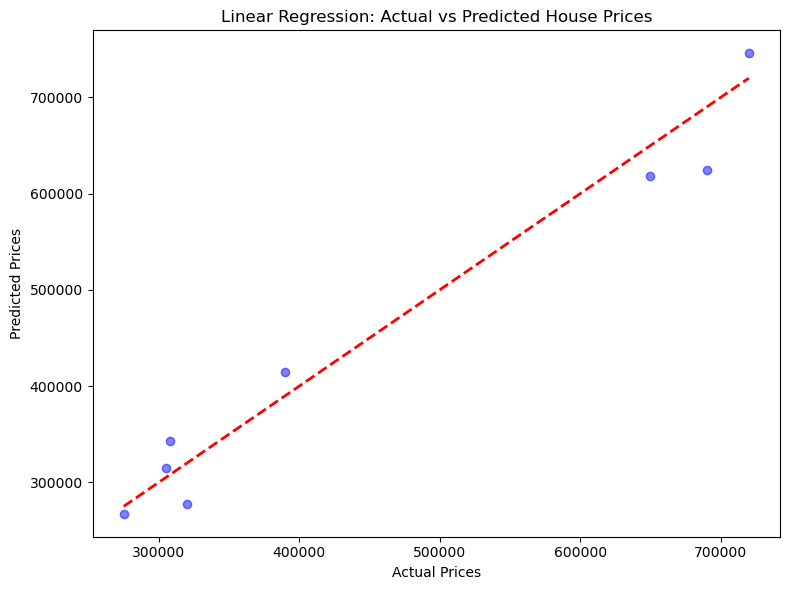

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()


In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled,y_train)


RandomForestRegressor(random_state=42)

In [39]:
y_prediction_rf=rf_model.predict(X_test_scaled)

In [40]:
mse_rf = mean_squared_error(y_test, y_prediction_rf)
r2_rf = r2_score(y_test, y_prediction_rf)
print("\nRandomForest Regression Results:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")


RandomForest Regression Results:
Mean Squared Error: 528531150.00
R-squared: 0.98


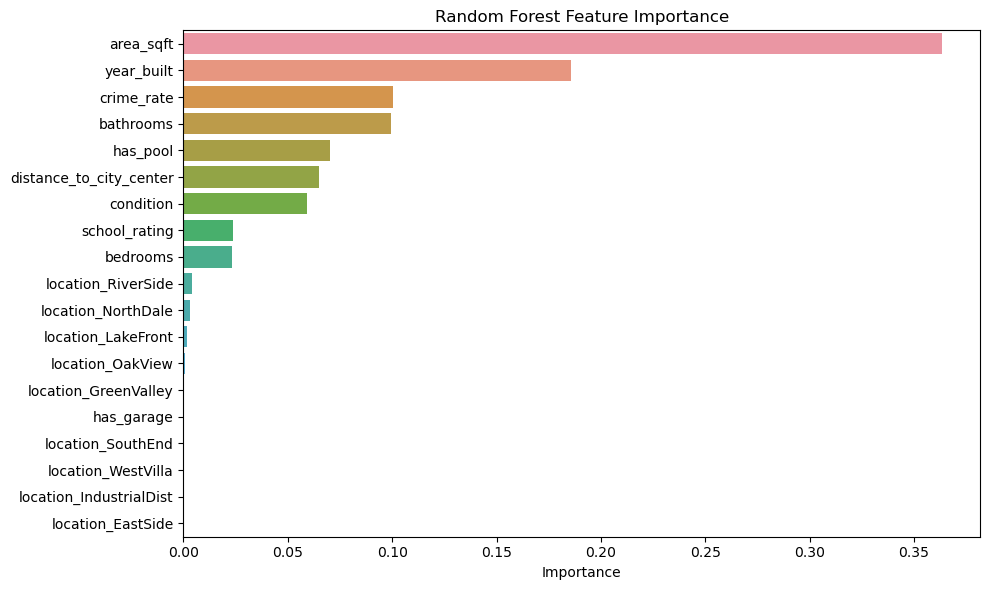

In [41]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()